In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib inline

Load the dataset Data1.csv into a pandas dataframe

In [2]:
data1 = pd.read_csv("data/Data1.csv")

Split the labels (A5) from the rest of the data.

In [3]:
df = data1.drop(['A5'], axis=1)
X = df.values

## Data exploration

In [4]:
df.head()

,A1,A2,A3,A4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The dataset is made of 4 numerical features.
We do not have binary values, discrete attributes, or categorical variables.

In [5]:
df.describe()

,A1,A2,A3,A4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The values are also within similar range (0-10).

I tried to scale them and run the experiement. It didn't have an effect the result

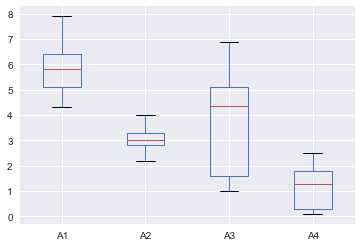

In [6]:
df.plot(kind='box')

### First observations
There doesn't seem to have particular outliers.

A solution like kmeans for clustering seems like a first good choice.

## Identification of number of optimal clusters

In this section I will try to find the optimal number of clusters in our dataset.
I will use two different techniques for that:
 - Elbow method
 - Silhouette score Analysis

### Elbow analysis

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion".

source: [wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering%29)

In [7]:
cluster_range = range(1, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X)
    cluster_errors.append(clusters.inertia_)

In [8]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

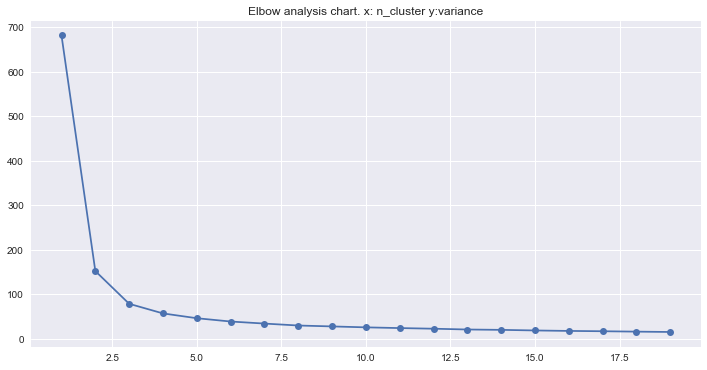

In [9]:
plt.figure(figsize=(12,6))
plt.title("Elbow analysis chart. x: n_cluster y:variance")
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

#### Note:
The elbow diagram shows that the gain in explained variance reduces significantly from 3, so that should probably be the optimal number of clusters.

### Silhouette Analysis

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

source: [wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering%29),
        [sklearn](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

For n_clusters = 2 The average silhouette_score is : 0.681046169212


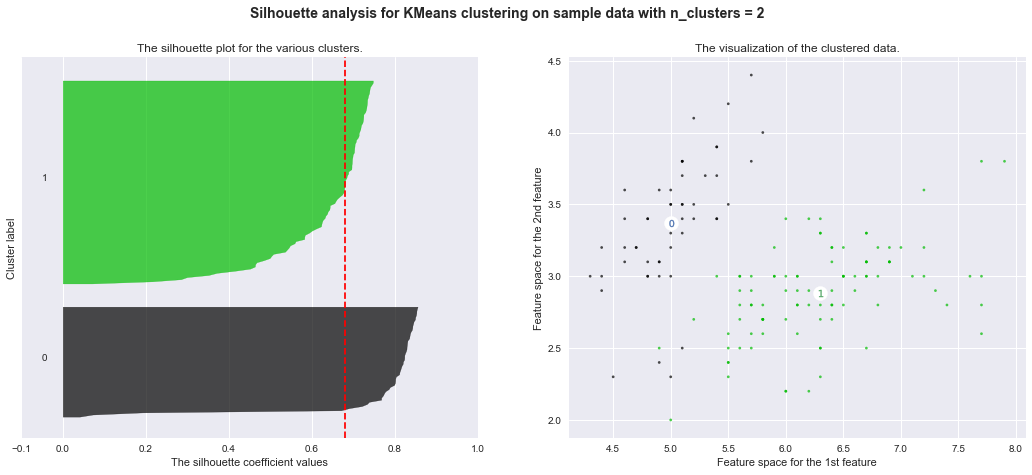

For n_clusters = 3 The average silhouette_score is : 0.552819012356


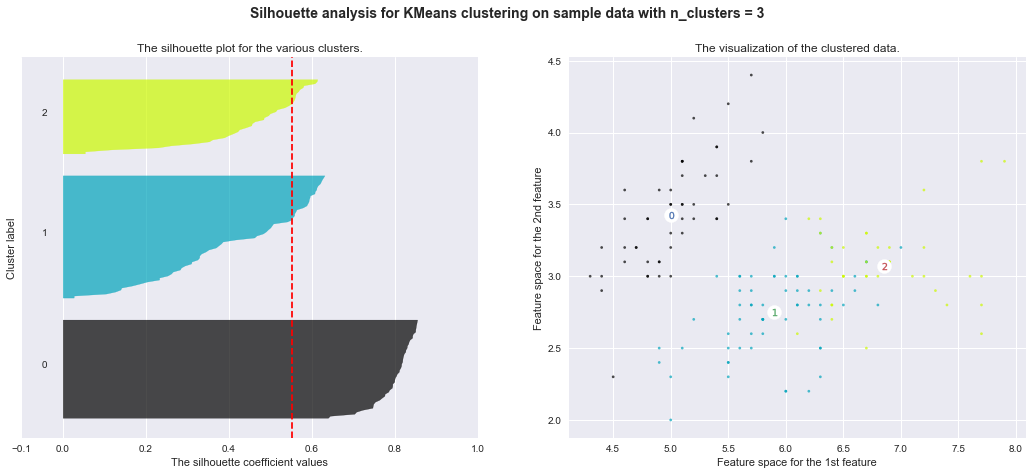

For n_clusters = 4 The average silhouette_score is : 0.498050504997


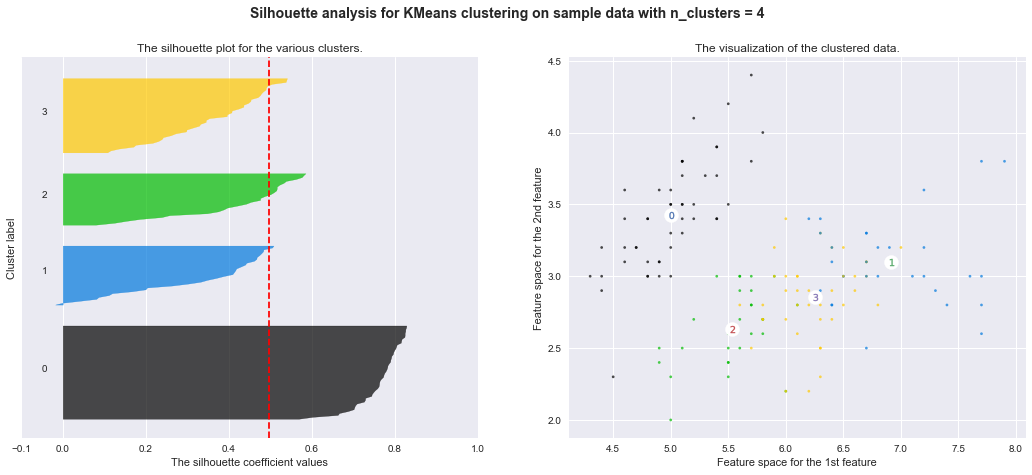

For n_clusters = 5 The average silhouette_score is : 0.488748887093


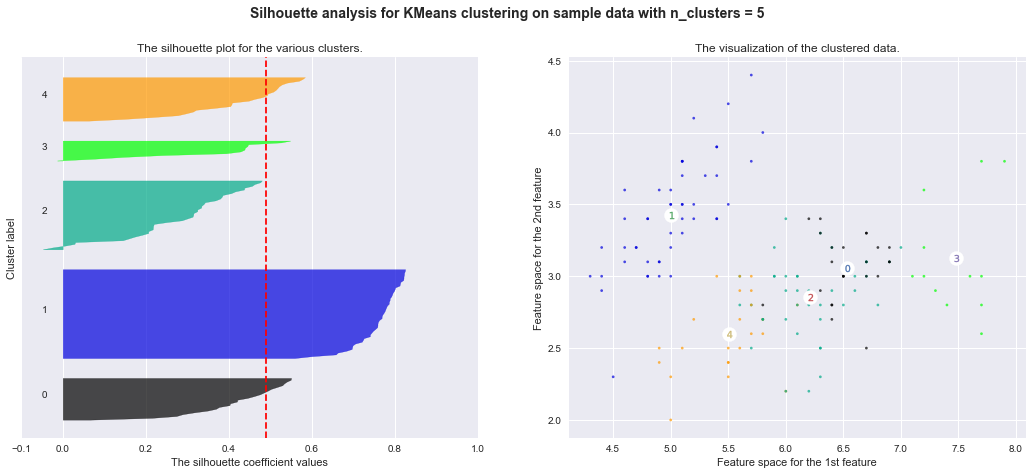

In [10]:
cluster_range = range(2, 6)

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
    centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

    plt.show()

#### Note:
At 4 and 5 :
The silhouette plot shows that the n_clusters value of 4 and 5 are a bad pick for our data due to wide fluctuations in the size of the silhouette plots. Some observations assigned to wrong clusters.
We also have the presence of a cluster with below average silhouette scores.


At 2: 
cluster 1 seems to be much bigger in size than cluster 0. Some observations assigned to wrong clusters.

At 3: 
the plots' silhouette are more homogeneous, all clusters have observations that are more than the average silhouette score.

### Optimal number of clusters
I wanted to base my decision on 2 different methods, elbow, and silhouette.

From Silhouette, 3 seems a good pick, but the score for 4 and 5 are not so different.

With elbow I can see 4 and 5 are too much for the number of clusters.

I finally chose 3 as the optimal number of clusters. This number can usually be also decided based on business requirements.

## Explain your choice of model against other possible models for clustering. 
## What are the tradeoffs?

k-means is  one of  the simplest clustering  algorithms. 
It is easy to implement and computationally more efficient than other algorithms. 
It is therefore, the first choice for fast experimentations on a new dataset.
Approximately all we need to do is find the optimal "k", the number of clusters in our data.


Trade-offs:

- K-means requires apriori specification of the number of  cluster centers.
- Can be sensitive to scale of variables and outliers
- k-means can only handle numerical data
- k-means algorithm assumes that all clusters are equally sized and have the same variances.

## Using dimensionality reduction, create a visualization of the clusters you created.

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
print('Final centroids:\n', centroids)

Final centroids:
 [[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.428       1.462       0.246     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


In [12]:
from sklearn import preprocessing

projection = TSNE(n_components=2, random_state=0).fit_transform(X)

predictions = kmeans.predict(X)

labels = data1['A5'].values
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

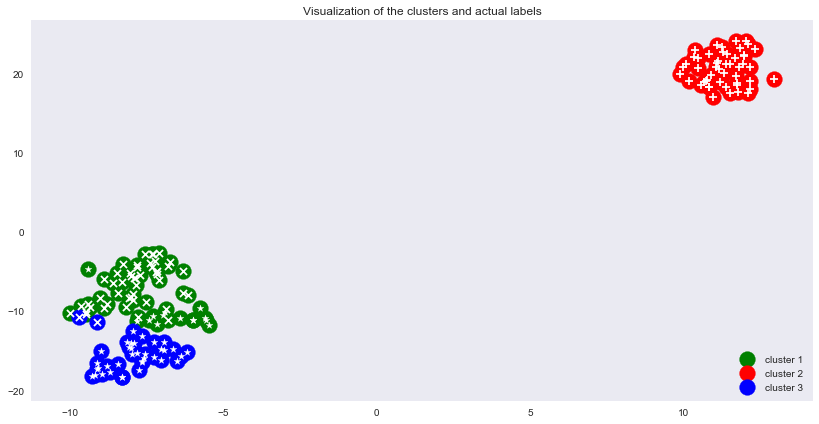

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.scatter(projection[predictions == 0,0], projection[predictions == 0,1], s=250, c='green', label='cluster 1')
plt.scatter(projection[predictions == 1,0], projection[predictions == 1,1], s=250, c='red', label='cluster 2')
plt.scatter(projection[predictions == 2,0], projection[predictions == 2,1], s=250, c='blue', label='cluster 3')

plt.scatter(projection[labels == 0,0], projection[labels == 0,1], s=50,marker='+', c='white')
plt.scatter(projection[labels == 1,0], projection[labels == 1,1], s=50,marker='x', c='white')
plt.scatter(projection[labels == 2,0], projection[labels == 2,1], s=50,marker='*', c='white')
plt.title('Visualization of the clusters and actual labels')
plt.legend(loc='lower right', scatterpoints=1)
plt.grid()
plt.show()

I can see the clustering model performed quite well in assignement of data.
However, I can spot a few mispredictions where cluster 1 and 3 overlap.